<a href="https://colab.research.google.com/github/SAMMOSES26/projects/blob/main/customer_conversion_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

# **dataset**

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


# **preprocessing data**

In [4]:
df.shape

(45211, 11)

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [6]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [7]:
df=df.drop_duplicates()

In [8]:
df.shape

(45205, 11)

In [9]:
df.nunique()

age                 77
job                 12
marital              3
education_qual       4
call_type            3
day                 31
mon                 12
dur               1573
num_calls           48
prev_outcome         4
y                    2
dtype: int64

In [10]:
df['job'].value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

mode imputation for unknown column

In [11]:
# imputed unknown values with mode
df['job']=df['job'].replace("unknown",df['job'].mode()[0])

In [12]:
df['job'].value_counts()

blue-collar      10018
management        9457
technician        7596
admin.            5170
services          4153
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [13]:
df['marital'].value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

In [14]:
df['education_qual'].value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

mode imputation for education_qual

In [15]:
#mode imputing 

mode_education_qual=df['education_qual'].mode()[0]
df['education_qual']=df['education_qual'].replace("unknown",mode_education_qual)

In [16]:
df['education_qual'].value_counts()

secondary    25056
tertiary     13299
primary       6850
Name: education_qual, dtype: int64

In [17]:
df['call_type'].value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

there are lot unknown values so we are not going to impute them we'r going to consider that as a seprate column

In [18]:
df['mon'].value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [19]:
df['prev_outcome'].value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

here also we not imputing . lots of unknown values . so we are going to consider unknown values as type here

In [20]:
df.shape

(45205, 11)

**outlier**

In [21]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


In [22]:
iqr=df['dur'].quantile(0.75) - df['dur'].quantile(0.25)
upper_threshold=df['dur'].quantile(0.75) + (1.5 * iqr)
lower_threshold=df['dur'].quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(643.0, -221.0)

In [23]:
df.dur=df.dur.clip(upper_threshold, lower_threshold)

In [24]:
iqr=df['num_calls'].quantile(0.75) - df['num_calls'].quantile(0.25)
upper_threshold=df['num_calls'].quantile(0.75) + (1.5 * iqr)
lower_threshold=df['num_calls'].quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(6.0, -2.0)

In [25]:
df.num_calls=df.num_calls.clip(upper_threshold, lower_threshold)

In [26]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.00000,45205.000000
mean,40.937087,15.80688,234.95620,2.392235
std,10.619130,8.32234,176.75476,1.600152
min,18.000000,1.00000,0.00000,1.000000
25%,33.000000,8.00000,103.00000,1.000000
50%,39.000000,16.00000,180.00000,2.000000
75%,48.000000,21.00000,319.00000,3.000000
max,95.000000,31.00000,643.00000,6.000000


In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
df['target']=df['y'].map({'yes':1,'no':0})

In [29]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')

In [30]:
df.groupby('job')['target'].mean()

job
admin.           0.122050
blue-collar      0.074067
entrepreneur     0.082717
housemaid        0.087903
management       0.137570
retired          0.227915
self-employed    0.118429
services         0.088851
student          0.286780
technician       0.110585
unemployed       0.155027
Name: target, dtype: float64

In [31]:
df.groupby('marital')['target'].mean()

marital
divorced    0.119455
married     0.101250
single      0.149515
Name: target, dtype: float64

In [32]:
df.groupby('education_qual')['target'].mean()

education_qual
primary      0.086277
secondary    0.107838
tertiary     0.150086
Name: target, dtype: float64

In [33]:
df.groupby('call_type')['target'].mean()

call_type
cellular     0.149204
telephone    0.134205
unknown      0.040716
Name: target, dtype: float64

In [34]:
df.groupby('mon')['target'].mean()

mon
apr    0.196794
aug    0.110168
dec    0.467290
feb    0.166478
jan    0.101212
jul    0.090949
jun    0.102266
mar    0.519916
may    0.067199
nov    0.101511
oct    0.437669
sep    0.464594
Name: target, dtype: float64

In [35]:
df.groupby('prev_outcome')['target'].mean()

prev_outcome
failure    0.126097
other      0.166848
success    0.647253
unknown    0.091630
Name: target, dtype: float64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45205 entries, 0 to 45210
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45205 non-null  int64  
 1   job             45205 non-null  object 
 2   marital         45205 non-null  object 
 3   education_qual  45205 non-null  object 
 4   call_type       45205 non-null  object 
 5   day             45205 non-null  int64  
 6   mon             45205 non-null  object 
 7   dur             45205 non-null  float64
 8   num_calls       45205 non-null  float64
 9   prev_outcome    45205 non-null  object 
 10  y               45205 non-null  object 
 11  target          45205 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


# **EDA**

in eda 2 plots are important

* distribution of feature plot --> to see how is my feature distributed
* feature vs target plot --> to find relationship between feature nd target

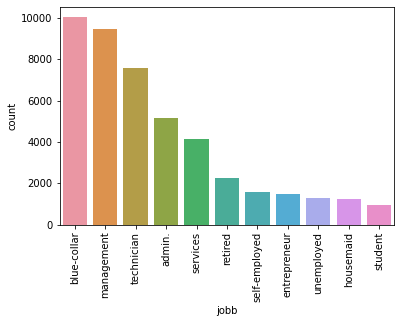

In [37]:
df_j = pd.DataFrame(df.job.value_counts()).sort_values("job",ascending=False).reset_index()
df_j.rename(columns={"index":"jobb","job":"count"}, inplace=True)
bar=sns.barplot(x=df_j["jobb"],y=df_j["count"],data=df_j)
bar.tick_params(axis="x" ,rotation=90)

<Axes: ylabel='job'>

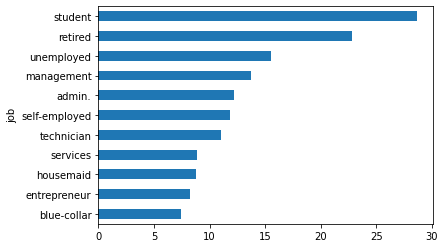

In [38]:
(df.groupby("job")['target'].mean()*100).sort_values().plot(kind="barh")

ordered relationship here so do label encoding

<Axes: ylabel='marital'>

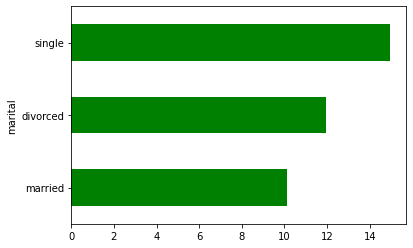

In [39]:
(df.groupby("marital")['target'].mean()*100).sort_values().plot(kind="barh",color='green')

ordered relationship here so do label encoding

<Axes: ylabel='education_qual'>

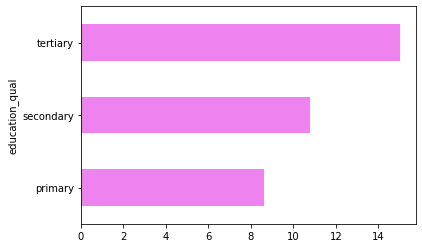

In [40]:
(df.groupby("education_qual")['target'].mean()*100).sort_values().plot(kind="barh",color='violet')

<Axes: ylabel='call_type'>

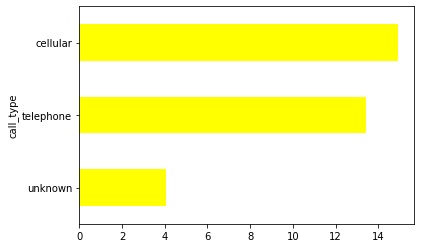

In [41]:
(df.groupby("call_type")['target'].mean()*100).sort_values().plot(kind="barh",color='yellow')

<Axes: ylabel='mon'>

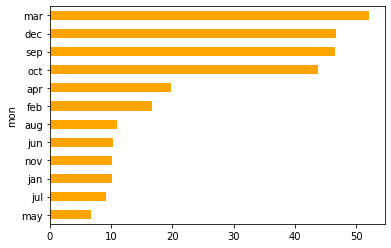

In [42]:
(df.groupby("mon")['target'].mean()*100).sort_values().plot(kind="barh",color='orange')

<Axes: ylabel='prev_outcome'>

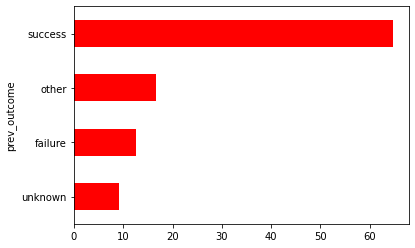

In [43]:
(df.groupby("prev_outcome")['target'].mean()*100).sort_values().plot(kind="barh",color='red')

we do this above plotting for 3 reasons 

1. to find is this feature important
2. is there order in data
3. what sort of encoding to do

plot between continus feature vs target

# **Encoding**

In [44]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,management,married,tertiary,unknown,5,may,261.0,1.0,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151.0,1.0,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76.0,1.0,unknown,no,0
3,47,blue-collar,married,secondary,unknown,5,may,92.0,1.0,unknown,no,0
4,33,blue-collar,single,secondary,unknown,5,may,198.0,1.0,unknown,no,0


In [45]:
#job encoding
df.job=df.job.map({'blue-collar':0,'entrepreneur':1,'housemaid':2,'services':3,'technician':4,'self-employed':5,'admin.':6,'management':7,'unemployed':8,'retired':9,'student':10})

In [46]:
#marital encoding
df.marital=df.marital.map({'married':0,'divorced':1,'single':2})

In [47]:
#education_qual encoding
df.education_qual=df.education_qual.map({'primary':0,'secondary':1,'tertiary':2})

In [48]:
#call_type encoding
df.call_type=df.call_type.map({'unknown':0,'telephone':1,'cellular':2})

In [49]:
#mon encoding
df.mon=df.mon.map({'may':0,'jul':1,'jan':2,'nov':3,'jun':4,'aug':5,'feb':6,'apr':7,'oct':8,'sep':9,'dec':10,'mar':11})

In [50]:
#prev_outcome encoding
df.prev_outcome=df.prev_outcome.map({'unknown':0,'failure':1,'other':2,'success':3})

# **splitting**

In [51]:
#encoded y (target column) to target so dropped y
df=df.drop(['y'], axis=1)

In [52]:
X = df.drop('target', axis=1).values
y = df['target'].values

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

# **balancing**

In [54]:
df['target'].value_counts()

0    39916
1     5289
Name: target, dtype: int64

data is imbalance because more than 70 % data belongs to one class

In [55]:
df.shape

(45205, 11)

In [56]:
len(X_train),len(y_train)

(33903, 33903)

In [57]:
#balancing data
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
X_smt, y_smt = smt.fit_resample(X_train,y_train)

In [58]:
len(X_smt),len(y_smt)

(51413, 51413)

# **scaling**

**scaling is confusing fit transform is balanced train data**

**transform is unbalanced test data**

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_smt)
X_test_scaled = scaler.transform(X_test)

In [60]:
X_train_scaled


array([[ 0.66577098,  0.81598839, -0.87321955, ..., -0.31281281,
         2.60417376, -0.57877646],
       [-0.95806835,  0.46930457, -0.87321955, ..., -1.10808401,
         2.60417376,  1.65001099],
       [-1.7272554 ,  0.46930457,  1.47109662, ..., -1.35095126,
        -0.85234815,  0.53561726],
       ...,
       [-0.70150196,  0.46930457,  1.47109662, ..., -1.34046702,
        -0.85234815, -0.1339093 ],
       [ 0.15625912,  0.46930457, -0.82824104, ...,  1.56345576,
         1.16851099, -0.57877646],
       [-0.80776883,  0.81598839,  1.47109662, ...,  0.51809221,
        -0.44710452,  0.80462705]])

In [61]:
X_test_scaled


array([[-0.44527698,  0.81598839, -0.87321955, ..., -0.1318529 ,
         1.221565  , -0.57877646],
       [-0.10341607,  0.12262076, -0.87321955, ..., -1.20332607,
        -0.85234815, -0.57877646],
       [-0.53074221,  0.81598839, -0.87321955, ..., -0.72235367,
        -0.16104377, -0.57877646],
       ...,
       [-0.35981175, -0.22406305,  1.47109662, ..., -0.49853483,
        -0.85234815, -0.57877646],
       [ 0.92216666,  0.46930457, -0.87321955, ..., -0.78902311,
         0.53026061, -0.57877646],
       [-1.1289988 , -0.57074686, -0.87321955, ..., -0.63187371,
        -0.16104377,  0.53561726]])

# **logistic** **regression**

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression() 
lr.fit(X_train_scaled,y_smt)
lr.score(X_test_scaled,y_test)
# y_pred=lr.predict(X_test_scaled)
logistic_auroc=roc_auc_score(y_test,lr.predict_proba(X_test_scaled)[:,-1])

In [83]:
print(logistic_auroc)

0.890437218517762


# **knn**

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

KNN =KNeighborsClassifier()
KNN.fit(X_train_scaled,y_smt)
KNN.score(X_test_scaled,y_test)

0.8146345779508052

In [65]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import cross_val_score
# for i in [1,2,3,4,5,6,7,8,9,10,20]:
#   KNN= KNeighborsClassifier(n_neighbors=i) #initialising the model
#   KNN.fit(X_train_scaled,y_smt) # training the model
#   print("K value  : " , i, " Accuracy Score : ", KNN.score(X_train_scaled,y_smt) , " cv score : ", np.mean(cross_val_score(KNN, X_train_scaled, y_smt, cv=10)))

In [66]:
from sklearn.metrics import roc_auc_score
KNN = KNeighborsClassifier(3)
KNN.fit(X_train_scaled,y_smt)
KNN.score(X_test_scaled,y_test)
knn_auroc=roc_auc_score(y_test,KNN.predict_proba(X_test_scaled)[:,1])
knn_auroc

0.8498403211450916

# **decision tree**

In [67]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_smt)
dt.score(X_test_scaled,y_test)

0.8524155016811183

In [68]:
# from sklearn.metrics import accuracy_score, roc_auc_score
# # from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
# # import numpy as np

# for depth in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
#   dt = DecisionTreeClassifier(max_depth=depth) 
#   dt.fit(X_train_scaled, y_smt)
#   trainAccuracy = accuracy_score(y_smt, dt.predict(X_train_scaled))
#   dt = DecisionTreeClassifier(max_depth=depth)
  
#   # valAccuracy = cross_val_score(dt, X_train_scaled, y_smt, cv=10)
#   print("Depth  : ", depth, " Training Accuracy : ",trainAccuracy, " Cross val score : " ,np.mean(cross_val_score(dt,X_train_scaled,y_smt,cv=10)))

In [69]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X_train_scaled, y_smt)
dt.score(X_test_scaled,y_test)
y_pred=dt.predict_proba(X_test_scaled)[:,1]

#evaluation metric
decisiontree_auroc=roc_auc_score(y_test,y_pred)
decisiontree_auroc

0.8603116275874478

# **random forest**

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100, max_depth=4, max_features="sqrt")
rf.fit(X_train_scaled,y_smt)
randomforest_auroc=roc_auc_score(y_test,rf.predict_proba(X_test_scaled)[:,1])
randomforest_auroc

0.8832087713634684

In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,rf.predict(X_test_scaled))

array([[7685, 2299],
       [ 174, 1144]])

# **XGBoost**

In [72]:
import xgboost as xgb

In [74]:
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.3,0.5,0.75,1]:
  xg = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  xg.fit(X_train_scaled,y_smt)
  xg.score(X_test_scaled, y_test)
  print("Learning rate : ", lr, " Train score : ", xg.score(X_train_scaled,y_smt), " Cross-Val score : ", np.mean(cross_val_score(xg, X_train_scaled, y_smt, cv=10)))

Learning rate :  0.01  Train score :  0.9433995293019275  Cross-Val score :  0.9390631526616471
Learning rate :  0.02  Train score :  0.9539999610993328  Cross-Val score :  0.9491580109144604
Learning rate :  0.03  Train score :  0.9612938361892907  Cross-Val score :  0.9557909579193844
Learning rate :  0.04  Train score :  0.9665843269212067  Cross-Val score :  0.9604592649856694
Learning rate :  0.05  Train score :  0.9701826386322525  Cross-Val score :  0.9632019712334644
Learning rate :  0.06  Train score :  0.9727111819967712  Cross-Val score :  0.9651471786178198
Learning rate :  0.07  Train score :  0.9746756656876665  Cross-Val score :  0.9659058842470417
Learning rate :  0.08  Train score :  0.9761344407056581  Cross-Val score :  0.966703428504807
Learning rate :  0.09  Train score :  0.9772625600529049  Cross-Val score :  0.9673647708710058
Learning rate :  0.1  Train score :  0.9784879310680178  Cross-Val score :  0.9674037532482476
Learning rate :  0.11  Train score :  0.97

In [85]:
xg = xgb.XGBClassifier(learning_rate = 0.14, n_estimators=100,verbosity=0)
xg.fit(X_train_scaled,y_smt) #train the model
XGBoost_auroc=roc_auc_score(y_test,xg.predict_proba(X_test_scaled)[:,1])
XGBoost_auroc

0.922528131505097

In [86]:
xg.score(X_train_scaled,y_smt)

0.9813860307704277

In [87]:
confusion_matrix(y_test,xg.predict(X_test_scaled))

array([[8931, 1053],
       [ 303, 1015]])

In [88]:
pd.DataFrame({"model":["Logistic Regression","Knn ","Decision Tree","Random Forest","XgBoost"],"AUROC":[logistic_auroc,knn_auroc,decisiontree_auroc,randomforest_auroc,XGBoost_auroc]})

,model,AUROC
0,Logistic Regression,0.890437
1,Knn,0.849840
2,Decision Tree,0.860312
3,Random Forest,0.883209
4,XgBoost,0.922528


# **Feature importance**

In [95]:
columns = df.drop('target', axis=1).columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome'],
      dtype='object')

In [102]:
values=xg.feature_importances_
values

array([0.01715894, 0.0346084 , 0.05773068, 0.08164132, 0.22780234,
       0.02379358, 0.10880625, 0.20453347, 0.05095058, 0.1929744 ],
      dtype=float32)

In [ ]:
values.sort_values(imp,ascending=False,inplace=True)

In [107]:
a=pd.DataFrame({"imp":values,"ft":columns})


In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(original_feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];